In [1]:
import os
import sys
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=10,10


sys.path.append('/home/chris/src/provenance_py')

if __name__ == "__main__" and __package__ is None:
    __package__ = "provenance_lib"

from .parse import ProvDAG, ProvNode, Config


In [2]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.nodes


NodeView((1, 2, 3))

In [3]:
H = nx.DiGraph(G)
G.nodes

NodeView((1, 2, 3))

In [8]:
cwd = os.getcwd()
DATA_DIR = os.path.join(cwd, '../tests/data')
qzv = os.path.join(DATA_DIR, 'v5_uu_emperor.qzv')
dag = ProvDAG(artifact_data=qzv)
contents = dag.dag
nodes = list(contents)
nx.draw(dag.dag, with_labels=True, font_weight="bold")

In [11]:
# Get collapsed nodes...
ffb = 'ffb7cee3-2f1f-4988-90cc-efd5184ef003'
nested_nodes = dag.get_outer_provenance_nodes(ffb)
print(nested_nodes)

# ...and create a graphview
view = nx.subgraph_view(dag.dag, filter_node = lambda x: x in nested_nodes)
nx.draw(view, with_labels=True, font_weight="bold")

{'89af91c0-033d-4e30-8ac4-f29a3b407dc1', 'a35830e1-4535-47c6-aa23-be295a57ee1c', 'bce3d09b-e296-4f2b-9af4-834db6412429', '7ecf8954-e49a-4605-992e-99fcee397935', 'ffb7cee3-2f1f-4988-90cc-efd5184ef003', '99fa3670-aa1a-45f6-ba8e-803c976a1163'}


In [12]:
# Relabel nodes for readability
labels = {node: node[:8] for node in dag.nodes}
# This old version creates inconsistent state, where self.root_uuid != the dag's new root_uuid,
# rendering builtin graphviews fragile.
# nx.relabel_nodes(dag.dag, labels, copy=False)
# This works, though!
dag.relabel_nodes(labels)
nx.draw(dag.dag, with_labels=True, font_weight="bold")

In [13]:
# Show we can now reverse a DAG
nx.draw(dag.dag.reverse(), with_labels=True, font_weight="bold")

{'7ecf8954', 'ffb7cee3', '99fa3670', 'a35830e1', '89af91c0', 'bce3d09b'}


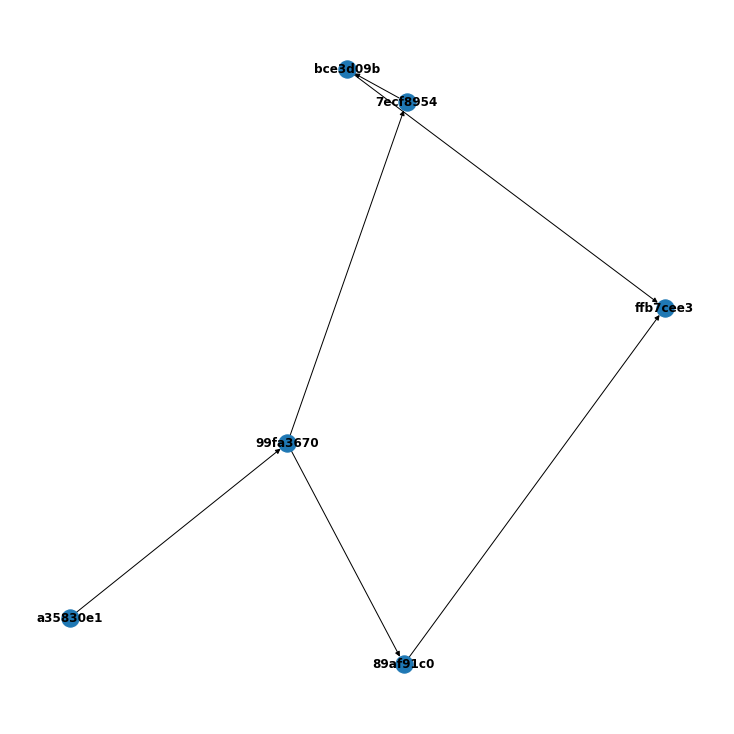

In [12]:
# Get nested nodes...
ffb = 'ffb7cee3'  # root uuid
nested_nodes = dag.get_nested_provenance_nodes(ffb)
print(nested_nodes)
# ...and create a graphview
def n_filter(node):
    ffb = 'ffb7cee3'
    nested_nodes = dag.get_nested_provenance_nodes(ffb)
    return node in nested_nodes

view = nx.subgraph_view(dag.dag, filter_node=n_filter)
nx.draw(view, with_labels=True, font_weight="bold")

In [18]:
# The cell above is now possible using only this guy:
nx.draw(dag.collapsed_view, with_labels=True, font_weight="bold")